In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces

In [ ]:
def plot_faces(images, n_col=3, n_row=2):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape((64, 64)), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())

In [ ]:
# Load faces data
dataset = fetch_olivetti_faces(shuffle=True)
faces = dataset.data

n_rows, n_cols = 2, 3
n_components = n_rows * n_cols
n_samples, n_features = faces.shape

print("Dataset consists of {} faces and {} features".format(n_samples, n_features))


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
Dataset consists of 400 faces and 4096 features


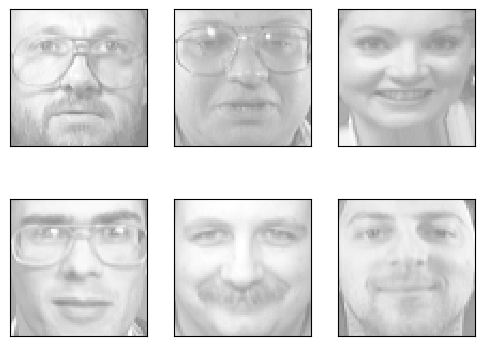

In [ ]:
# plot sample data
plot_faces(faces[:n_components], n_cols, n_rows)
plt.show()

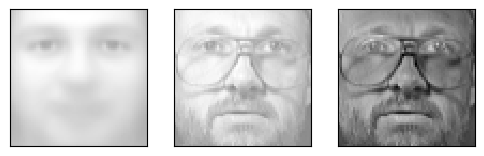

In [ ]:
# normalize data (only centering)
mean_face=faces.mean(axis=0)
normalized_faces=faces-mean_face
plot_faces(np.vstack((mean_face,faces[0],normalized_faces[0])),3,1)

<function matplotlib.pyplot.show(close=None, block=None)>

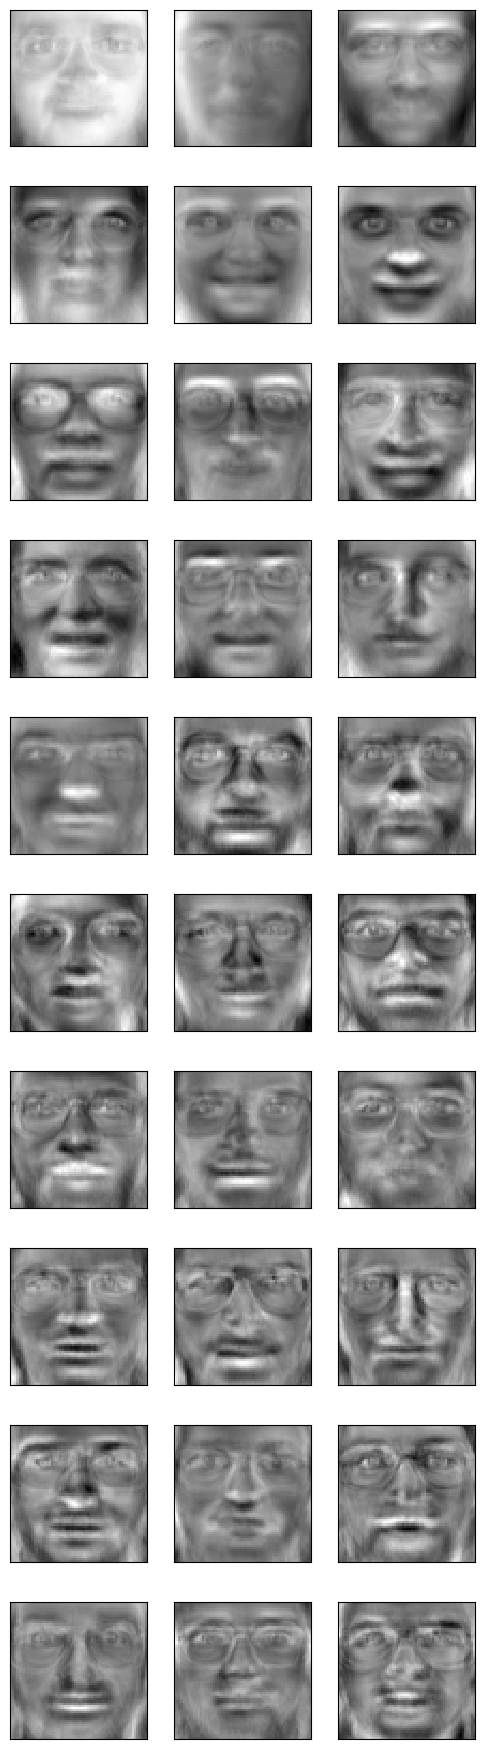

In [ ]:
# perform PCA and show components
faces_pca=PCA(n_components=30)
faces_pca.fit(normalized_faces)
eigen_faces=faces_pca.components_
plot_faces(eigen_faces,3,10)
plt.show

In [ ]:
print(faces_pca.explained_variance_ratio_)
print("Total explained ratio for 30 components:")
print(sum(faces_pca.explained_variance_ratio_))

[0.2381272  0.13993977 0.07968605 0.04998324 0.03609845 0.03156941
 0.0242683  0.02036398 0.01958116 0.01672121 0.0159522  0.01436979
 0.0124674  0.01147132 0.01062877 0.00977721 0.0091906  0.00815574
 0.00753874 0.00746985 0.00698576 0.00614628 0.00583924 0.00569713
 0.00546185 0.00531839 0.00513788 0.00495827 0.00457638 0.00440951]
Total explained ratio for 30 components:
0.8178910841234028
